# Сабиров А.А.
# ПИ21-1В

In [ ]:
import numpy as np

import dask
import dask.threaded as dthr
from dask.delayed import Delayed
from dask.threaded import get as t_get
from dask.multiprocessing import get as m_get
from dask import delayed, compute

from tqdm import tqdm

import time

# Первый пример  имитирует io-операцию, благодаря time.sleep создает заддержку

## Использование метода `get` из `from dask.THREADED import get`

`dask.threaded.get` более предпочтителен при работе с IO-bound задачами

In [ ]:
%%time
from dask import delayed

def factorial(n):
    if n <= 1:
        return 1
    time.sleep(0.1)
    return n * factorial(n-1)


def fibonacci(n):
    if n <= 1:
        return n
    time.sleep(0.1)
    return fibonacci(n-1) + fibonacci(n-2)



def add(x, y):
  return x + y



n1 = 3
n2 = 5


dsk = {
  'n1': n1,
  'n2': n2,
  'fact': (factorial, 'n1'),
  'fib': (fibonacci, 'n2'),
  'answer': (add, 'fact', 'fib')
}




for _ in tqdm(range(2, 7), desc='answer'):
  dsk['n1'] = _ + 1
  dsk['n2'] = _ - 1
  print(f'сложение: {t_get(dsk, "answer")}')

answer:  20%|██        | 1/5 [00:00<00:00,  4.95it/s]

сложение: 7


answer:  40%|████      | 2/5 [00:00<00:00,  3.82it/s]

сложение: 25


answer:  60%|██████    | 3/5 [00:00<00:00,  3.07it/s]

сложение: 122


answer:  80%|████████  | 4/5 [00:01<00:00,  2.53it/s]

сложение: 723


answer: 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]

сложение: 5045
CPU times: user 33.3 ms, sys: 3.44 ms, total: 36.8 ms
Wall time: 2.14 s


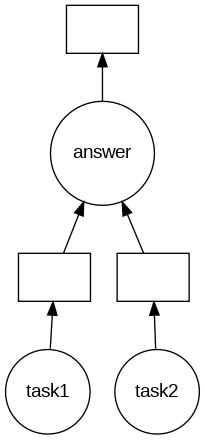

In [ ]:
delayed_dsk = Delayed("answer", dsk)

delayed_dsk.visualize()

## Использование метода `get` из `from dask.MULTIPROCESSING import get`

`dask.multiprocessing.get` более предпочтителен при работе с CPU-bound задачами

In [ ]:
%%time


for _ in tqdm(range(2, 7), desc='answer'):
    fact = factorial(_ + 1)
    fib = fibonacci(_ - 1)
    answer = add(fact, fib)
    print(f"сложение: {answer}")




answer:  20%|██        | 1/5 [00:00<00:00,  4.97it/s]

сложение: 7


answer:  40%|████      | 2/5 [00:00<00:00,  3.13it/s]

сложение: 25


answer:  60%|██████    | 3/5 [00:01<00:00,  2.23it/s]

сложение: 122


answer:  80%|████████  | 4/5 [00:02<00:00,  1.59it/s]

сложение: 723


answer: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]

сложение: 5045
CPU times: user 29.5 ms, sys: 3.63 ms, total: 33.1 ms
Wall time: 3.42 s


## Работа обычного цикла

In [ ]:
%%time

for _ in tqdm(range(2,7), desc='answer'):
  dsk['n1'] = _ + 1
  dsk['n2'] = _ - 1
  print(f'сложение: {m_get(dsk, "answer")}')

answer:  20%|██        | 1/5 [00:00<00:02,  1.35it/s]

сложение: 7


answer:  40%|████      | 2/5 [00:01<00:02,  1.18it/s]

сложение: 25


answer:  60%|██████    | 3/5 [00:02<00:01,  1.03it/s]

сложение: 122


answer:  80%|████████  | 4/5 [00:04<00:01,  1.15s/it]

сложение: 723


answer: 100%|██████████| 5/5 [00:06<00:00,  1.20s/it]

сложение: 5045
CPU times: user 84.2 ms, sys: 8.39 ms, total: 92.6 ms
Wall time: 6.02 s


#
#
#
#
#
#
# Второй пример  имитирует cpu-задачу

## Использование метода `get` из `from dask.THREADED import get`

`dask.threaded.get` более предпочтителен при работе с IO-bound задачами

In [ ]:
%%time



def cpu_task1():
    return sum([np.random.randint(0, 10) for _ in range(100_000)])


def cpu_task2():
    bank = [np.random.randint(0, 10) for _ in range(100_000)]
    avg = sum(bank) / len(bank)
    return sum([(num - avg) ** 2 for num in bank])


def add(x, y):
    return x + y


dsk = {
    'task1': (cpu_task1,),
    'task2': (cpu_task2,),
    'answer': (add, 'task1', 'task2')
}


print(f'сложение: {t_get(dsk, "answer")}')

сложение: 1273572.9422402503
CPU times: user 629 ms, sys: 7.95 ms, total: 637 ms
Wall time: 644 ms


## Использование метода `get` из `from dask.MULTIPROCESSING import get`

`dask.multiprocessing.get` более предпочтителен при работе с CPU-bound задачами

In [ ]:
%%time


def cpu_task1():
    return sum([np.random.randint(0, 10) for _ in range(100_000)])


def cpu_task2():
    bank = [np.random.randint(0, 10) for _ in range(100_000)]
    avg = sum(bank) / len(bank)
    return sum([(num - avg) ** 2 for num in bank])


def add(x, y):
    return x + y


dsk = {
    'task1': (cpu_task1,),
    'task2': (cpu_task2,),
    'answer': (add, 'task1', 'task2')
}


print(f'сложение: {m_get(dsk, "answer")}')

сложение: 1274595.8361596232
CPU times: user 17.9 ms, sys: 0 ns, total: 17.9 ms
Wall time: 1.24 s


## Работа обычного цикла

In [ ]:
%%time

print(f'сложение: {add(cpu_task1(), cpu_task2())}')

сложение: 1274271.999839833
CPU times: user 631 ms, sys: 1.18 ms, total: 632 ms
Wall time: 639 ms


# `CPU times: user 36.2 ms`, sys: 513 µs, total: 36.7 ms - `multiprocessing`
# `CPU times: user 667 ms`, sys: 0 ns, total: 667 ms     - `обычный код`
# `CPU times: user 1.2 s`, sys: 876 µs, total: 1.2 s     - `threading`
#
#
#
#
#
#
#
#

In [ ]:
cpu_task_delayed = delayed(cpu_task2)
cpu_task_delayed().compute()

example = [cpu_task_delayed() for _ in range(10)]

In [ ]:
%%time
# THREADING
answer_thread = dask.compute(example, scheduler="threading")

CPU times: user 3.2 s, sys: 17.4 ms, total: 3.22 s
Wall time: 3.23 s


In [ ]:
%%time
# MULTIPROCESSING
answer_multi = dask.compute(example, scheduler="multiprocessing")

CPU times: user 38.3 ms, sys: 3.2 ms, total: 41.5 ms
Wall time: 4.05 s


In [ ]:
%%time
# ОБЫЧНЫЙ ЦИКЛ
multi = [cpu_task2() for _ in range(10)]

CPU times: user 3.8 s, sys: 10 ms, total: 3.81 s
Wall time: 3.85 s


`CPU times: user 45.3 ms, sys: 3.93 ms, total: 49.2 ms  Wall time: 4.29 s` лучше всего у `multiprocessing`

Но почему-то общее время работы больше чем у обычного цикла
